In [3]:
%pylab inline
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

# import fmt

Populating the interactive namespace from numpy and matplotlib


# Homework Set 1

## Problem 1:

Set up your Python and IPython notebook environment and show case the following IPython functionalities:

2. use ? or help() to show comments (docstring) of a python function
3. use %pdb to debug the following code, show how to print out the value of b inside function bug() using the debugger

In [4]:
%pdb on 

def div(a, b) :
    return a/b

def bug(a, b) :
    % debug
    return div(a, b)

bug(3, 0)

Automatic pdb calling has been turned ON
> <ipython-input-2-c0f758d9a6c3>(1)<module>()
----> 1 a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
      2 b = a + 1
      3 print("a=\n", a)
      4 print("\nb=\n", b)
      5 c = a.dot(b) # matrix product

ipdb> p b
*** NameError: name 'b' is not defined
ipdb> q


ZeroDivisionError: division by zero

> <ipython-input-4-ffbca2f0aad7>(4)div()
      2 
      3 def div(a, b) :
----> 4     return a/b
      5 
      6 def bug(a, b) :

ipdb> q


## Problem 2:

For the first term of the conditional variance expression of the CIR process discused in the class:

$$f(\kappa) = \frac{r_0\sigma^2}{\kappa}(e^{-\kappa t} - e^{-2\kappa t})$$

1. compute its condition number, assuming $\kappa$ is the only variable, comment on whether the computation is stable around $\kappa = 0$
2. implement a function to compute the above expression, which is numerically stable around $\kappa = 0$. A typical approach is to switch to an approximation when $\kappa$ is smaller than a threshold $h$. Explain your choice of $h$, is the $h$ different for double or single precision calculation?  

## Problem 3:

Implement a matrix product function using hand coded loops in python, please feel free to use numpy array and numpy vector multiplications, but obviously you should not just call numpy matrix multiplication.

Compare the speed of your implementation to the numpy matrix product version, plot the difference in computational time with the size of the matrix.


Hint: 

* %timeit is a useful timing tool in IPython, or you can use time.clock() function
* numpy has two ways of representing matrix, one is array of arrays, another is matrix type. For array types, the matrix production is ```a.dot(b)```, for matrix type, the matrix production is ```a*b```. We recommend you to stick with array type to avoid any potential confusions. The ```a*b``` on array type is element wise multiplication. A common mistake is to use ```a*b``` for matrix production on array type. Please see the following code section as an example.
* numpy.allclose is a useful function to compare floating point calculation results


In [5]:
def matrix_multiply(matrix1, matrix2):
    if not isinstance(matrix1, np.ndarray):
        raise ValueError('matrix1 needs to be an numpy array.')
    if not isinstance(matrix2, np.ndarray):
        raise ValueError('matrix2 needs to be an numpy array.')
    row1, col1 = matrix1.shape
    row2, col2 = matrix2.shape
    if col1 != row2:
        raise ValueError('Incompatible matrices')
    result = np.empty(shape=(row1, col2))
    for i in range(row1):
        for j in range(col2):
            result[i][j] = matrix1[i].dot(matrix2[:, j])
    return matrix1.dot(matrix2)

In [6]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
b = a + 1
print("a=\n", a)
print("\nb=\n", b)
c = a.dot(b) # matrix product
d = a*b #elment wise multiplication

print("\nc=a.dot(b)\n", c)
print("\nd=a*b\n", d)

a=
 [[1 2 3]
 [4 5 6]
 [7 8 9]]

b=
 [[ 2  3  4]
 [ 5  6  7]
 [ 8  9 10]]

c=a.dot(b)
 [[ 36  42  48]
 [ 81  96 111]
 [126 150 174]]

d=a*b
 [[ 2  6 12]
 [20 30 42]
 [56 72 90]]


In [7]:
np.allclose(c, matrix_multiply(a, b))

True

In [8]:
%%timeit
matrix_multiply(a, b)

15.1 µs ± 323 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [9]:
%%timeit
a.dot(b)

799 ns ± 9.39 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


## Book problems (from Goodman and Bindel Book)

### 2.8

Hint: 

* The extra credit part of this problem is rather involved, you are encouraged to try but there is no need to spend too much time.
* In python, floating point numbers are double precision by default, but you can force them to be single precision by calling numpy.float32, please see the following example:

In [30]:
UPPER_BOUND = 20

In [31]:
fibs = [1, 1]
while len(fibs) < UPPER_BOUND:
    fibs.append(fibs[-1] + fibs[-2])

In [33]:
c = 1 + 3**0.5 / 100
pibs = [1, 1]
while len(pibs) < UPPER_BOUND:
    pibs.append(c * pibs[-1] + pibs[-2])

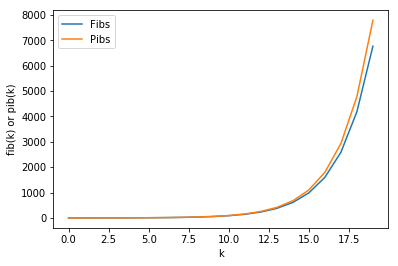

In [38]:
plt.figure()
plt.plot(range(UPPER_BOUND), fibs, label='Fibs')
plt.plot(range(UPPER_BOUND), pibs, label='Pibs')
plt.xlabel('k')
plt.ylabel('fib(k) or pib(k)')
plt.legend()
plt.show()

In [37]:
a = np.float32(1.)
b = np.float64(1.)

print(type(a), type(b))

<class 'numpy.float32'> <class 'numpy.float64'>
